In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [5]:
df = pd.read_excel('alunos.xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [6]:
df['mean'] = (df['ano_2015'] + df['ano_2016'])/2

In [7]:
df.head()

,UF,ano_2015,ano_2016,mean
0,Rondonia,77,85,81.0
1,Acre,79,81,80.0
2,Amazonas,83,85,84.0
3,Roraima,81,82,81.5
4,Para,73,76,74.5


Text(0, 0.5, '2016')

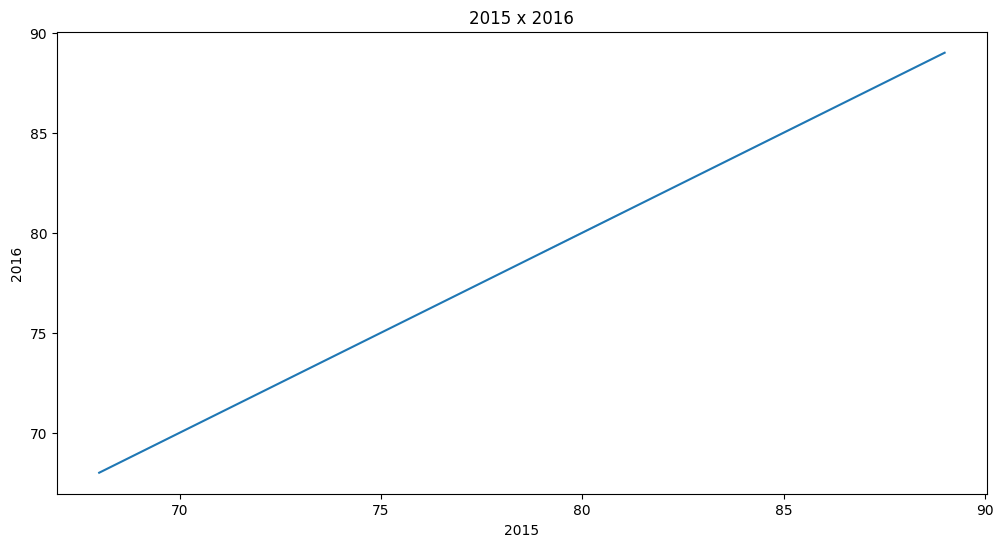

In [16]:
ax = sns.lineplot(data=df, x='ano_2015', y="ano_2015")
ax.figure.set_size_inches(12,6)
ax.set_title('2015 x 2016')
ax.set_xlabel('2015')
ax.set_ylabel('2016')

In [18]:
df1 = df.drop(columns={'UF', 'mean'})

In [19]:
df1.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [20]:
y = df.ano_2015
x = sm.add_constant(df.ano_2016)

In [21]:
rr = sm.OLS(y,x).fit()

In [22]:
print(rr.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           3.02e-10
Time:                        15:42:08   Log-Likelihood:                -59.298
No. Observations:                  27   AIC:                             122.6
Df Residuals:                      25   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3525      7.389      0.724      0.4

In [23]:
df['ano_2017'] = rr.predict()

In [30]:
df['ano_2017'] = df['ano_2017'].round()
df.head()

,UF,ano_2015,ano_2016,ano_2017
0,Rondonia,77,85,84.0
1,Acre,79,81,80.0
2,Amazonas,83,85,84.0
3,Roraima,81,82,81.0
4,Para,73,76,75.0
